# Sudoku Vizualization

# Convert all of these into plotter object methods

In [67]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sudoku.pandas_helper import hilo_thresh_feature

In [68]:
# load in puzzles and solutions

puzzles_path = os.path.join('data', 'puzzles')

puzzles = pd.read_parquet(
    os.path.join(puzzles_path, 'puzzles_3m.parquet')
)

solutions = pd.read_parquet(
    os.path.join(puzzles_path, 'solutions_3m.parquet')
)

stats = pd.read_parquet(
    os.path.join(puzzles_path, 'stats.parquet')
)

# lets pull our values for each bin

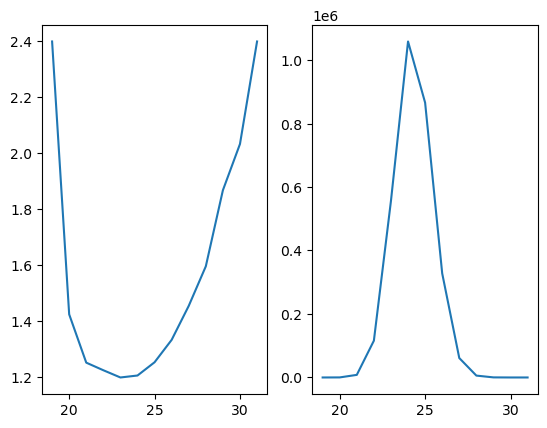

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

ax1.plot(
    stats.groupby(by='clues').mean().index,
    stats.groupby(by='clues').mean()
)

ax2.plot(
    stats.groupby(by='clues').count().index,
    stats.groupby(by='clues').count()
)

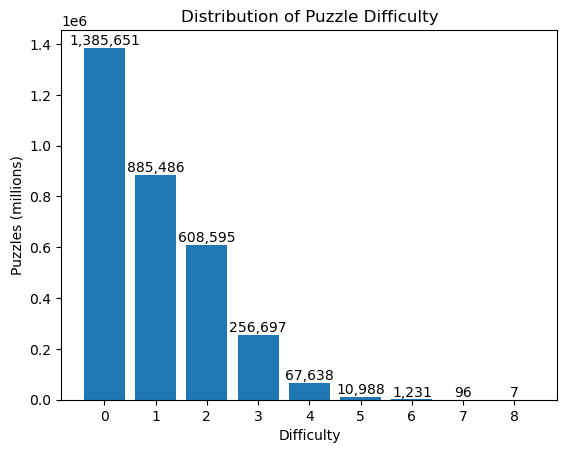

In [70]:
diff_counts = [hilo_thresh_feature(stats, i+1, i, 'difficulty').shape[0] for i in range(9)]

fig, ax = plt.subplots()
bar_container = ax.bar([i for i in range(len(diff_counts))], diff_counts)

ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_ylabel(ylabel='Puzzles (millions)')
ax.set_xlabel(xlabel='Difficulty')
ax.set_title('Distribution of Puzzle Difficulty')
ax.set_xticks([i for i in range(len(diff_counts))])
plt.show()

In [71]:
from sklearn.metrics import confusion_matrix
# diff5 = difficulty of 5
diff5_ndx = hilo_thresh_feature(stats, 6, 5, 'difficulty').index
diff5, diff5_sol = puzzles.iloc[diff5_ndx], solutions.iloc[diff5_ndx]
diff5 = (
    diff5 

)
diff5 = pd.DataFrame(
    [diff5.iloc[:,i].value_counts() for i in range(diff5.shape[1])],
    index=range(81)
).to_numpy()[:,1:]
diff5_sol = pd.DataFrame(
    [diff5_sol.iloc[:,i].value_counts() for i in range(diff5_sol.shape[1])],
    index=range(81)
).to_numpy()

Text(0.5, 0.98, 'Starting Configuration Distribution: Difficulty 5')

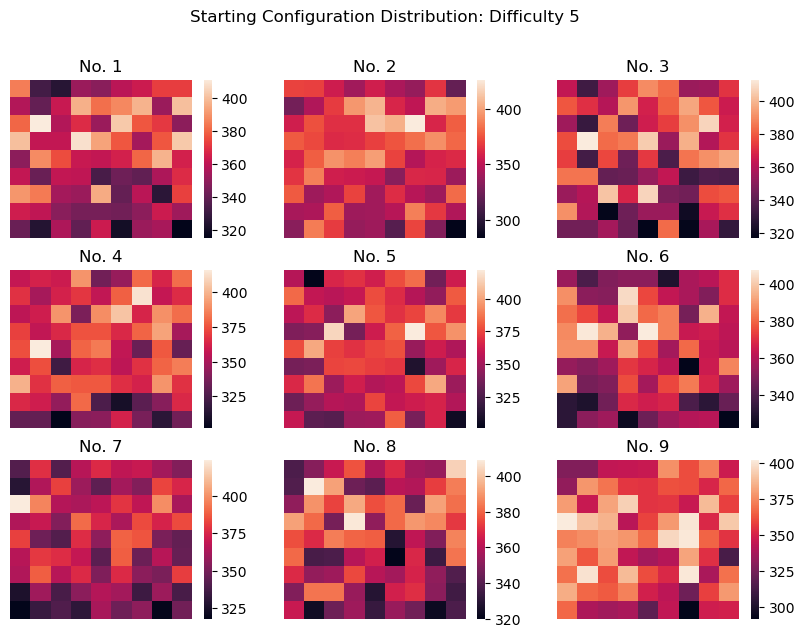

In [72]:
diff5 = np.array([
    np.reshape(diff5[:,i], (9,9)) for i in range(diff5.shape[1])
])
diff5_sol = np.array([
    np.reshape(diff5_sol[:,i], (9,9)) for i in range(diff5_sol.shape[1])
])

# plot as subplots
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10,7))
# for i in range(3):
#     for j in range(3):
for i, ax in enumerate(axes.flat):
    sns.heatmap(
        diff5[i,:,:], 
        ax=ax,
        cmap=sns.color_palette('rocket', as_cmap=True),
        # cbar = i == 5,
        cbar_ax=None
    ).set(
        xticklabels=[],
        yticklabels=[],
        title=f'No. {i+1}'
    )
    ax.tick_params(bottom=False, left=False)

# fig.tight_layout()
fig.suptitle(f"Starting Configuration Distribution: Difficulty 5")

(9, 9, 9)


Text(0.5, 0.98, 'Starting Configuration Distribution: Difficulty 5')

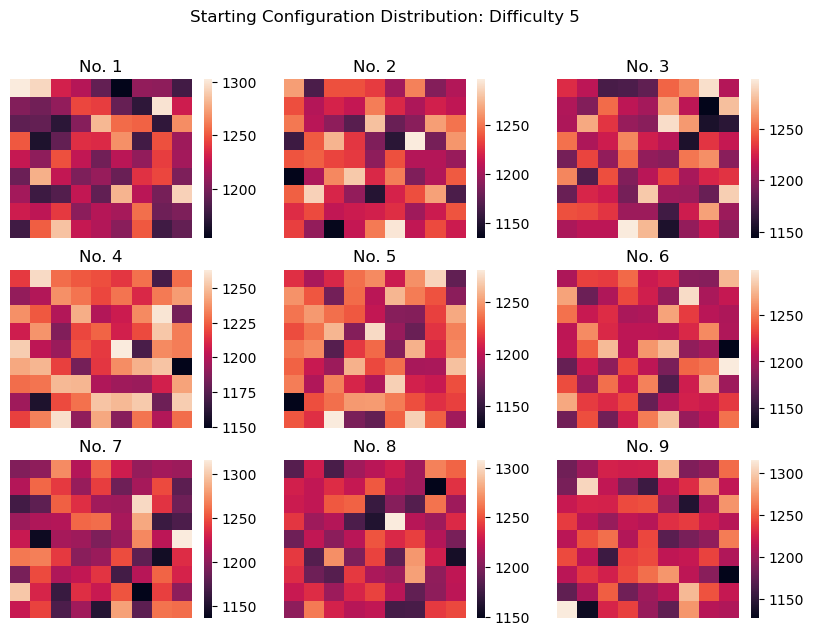

In [73]:
# these need to be normalized
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10,7))
print(diff5_sol.shape)
for i, ax in enumerate(axes.flat):
    sns.heatmap(
        diff5_sol[i,:,:], 
        ax=ax,
        cmap=sns.color_palette('rocket', as_cmap=True),
        # cbar = i == 5,
        cbar_ax=None
    ).set(
        xticklabels=[],
        yticklabels=[],
        title=f'No. {i+1}'
    )
    ax.tick_params(bottom=False, left=False)

# fig.tight_layout()
fig.suptitle(f"Starting Configuration Distribution: Difficulty 5")

# Sorting Based on Tile Values

## It seems other than cool looking decay graphs, there isn't too much going on with sorting in this manner

# Next